# DSAI Mini Project - Personal Key Indicators of Heart Disease

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,RocCurveDisplay,precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_predict
sb.set()

### Welcome to our model on the key indicators of heart disease! 

#### We will be attempting to establish a model that can successfully predict if an individual will have a cardiac episode based off several factors. 

#### Cardiac events result in the deaths of roughly 32.9% of the world's population every year, totalling close to 18 million deaths a year. Being a complicated disease with multiple factors that can cause a cardiac episode (from genetic conditions, to viral/bacterial infections, to accidents, to just pure bad luck), evaluating the probabilities of a cardiac event occuring is one of the top priorities that health professionals and scientists are attempting to identify. 

#### With the use of our model, we will attempt to predict the possibility of an individual getting a heart attack through various factors that is explained below. Our dataset is taken from Kaggle and contains roughly 70,000 values regarding heart related factors of the individuals. We hope this is able to shed some light on what may cause cardiac events and how much of a factor it is.

#### Our problem statement is, "to be able to make a prediction on whether an individual will have a cardiac episode, given some key indicators about an individual's present health status."

#### Our project is summarised into 5 different categories that will procedurally prepare, analyse and then model the data. They are:
1. Data Importing
2. Exploratory Analysis and Data Cleaning
3. Basic Data Modelling
4. Advanced Data Modelling
5. Conclusion

#### There are 3 types of inputs:
- Objective: Factual information;
- Examination: Results of medical examination;
- Subjective: Information given by the patient.

#### Factors:
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

##### It should be noted that all these dataset values were collected at the moment of medical examination, thereby promoting credibility

#### Before we continue, there are some terms that need to be explained and some commonly believed to be assumptions that we will attempt to verify through basic analysis of the following data

#### Explanations:

- Cardiovascular Disease: Disease of the heart or blood vessels that results in reduced blood flow to vital organs in the human body.
- Systolic Blood Pressure: Pressure exerted when blood is ejected from the heart and into the arteries
- Diastolic Blood Pressure: Pressure that blood exerts within the arteries and in between heartbeats
- Cholesterol: Constituent of cell membranes that is necessary for a body to function but an increased proportion in the body is associated with higher risk of cardiovascular disease


#### Assumptions:
1) The increase in age results in an increase in the chance of heart disease

2) The increase in cholesterol increaases the chance of heart disease

3) Smoking + Drinking habits increases the chance of heart disease

# 1) Data Importing

#### The first step is to import the dataset and clean the data by removing duplicates

In [5]:
heart = pd.read_csv('./cardio_train.csv')
heart.head()

,ID,Age,Gender,Height,Weight,ap_hi,ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
heartdata = pd.DataFrame(heart)
heartdata.info()

# Data column IDs, total count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           70000 non-null  int64  
 1   Age          70000 non-null  int64  
 2   Gender       70000 non-null  int64  
 3   Height       70000 non-null  int64  
 4   Weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   Cholesterol  70000 non-null  int64  
 8   Gluc         70000 non-null  int64  
 9   Smoke        70000 non-null  int64  
 10  Alco         70000 non-null  int64  
 11  Active       70000 non-null  int64  
 12  Cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
# Remove duplicate datasets before continuing

duplicates = len(heartdata) - len(heartdata.drop(['ID'],axis=1).drop_duplicates())
heartdata.drop(['ID'],axis=1,inplace=True)
heartdata.drop_duplicates(inplace=True)

print(f'{duplicates} duplicate records dropped.')

#Show how the current data looks like after duplicates are dropped
heartdata.shape

24 duplicate records dropped.


(69976, 12)

#### We will be modifying/transforming some columns in the dataset to make it easier for future analysis. These changes are: 
1) Creation of separate columns for the "Gender" data type in order to make more accurate predictions with respect to gender and this data set. The row is split into 2 new rows, "Male" and "Female"

2) Changing of the "Age" column's values to reflect status in terms of years old instead of days old. This makes analysis more relevant to the person's age in general as a few days of disparity is unlikely to make any effects in analysis but can be difficult to interpret later on.

In [8]:
# Insert separate rows for male and female and remove the generic 'gender' row
heartdata.insert(3, "Female", (heartdata['Gender']==1).astype(int))
heartdata.insert(4, 'Male', (heartdata['Gender']==2).astype(int))
heartdata.drop(['Gender'], axis=1, inplace=True)

# Change age from days to years
heartdata['Age'] = round(heartdata['Age']/365.25,2)

# Basic data characteristics such as count, mean, standard deviation and quartiles, rounded to 2 decimal places
heartdata.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,69976.0,53.30,6.76,29.56,48.36,53.94,58.39,64.92
Height,69976.0,164.36,8.21,55.00,159.00,165.00,170.00,250.00
Female,69976.0,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Male,69976.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Weight,69976.0,74.21,14.40,10.00,65.00,72.00,82.00,200.00
ap_hi,69976.0,128.82,154.04,-150.00,120.00,120.00,140.00,16020.00
ap_lo,69976.0,96.64,188.50,-70.00,80.00,80.00,90.00,11000.00
Cholesterol,69976.0,1.37,0.68,1.00,1.00,1.00,2.00,3.00
Gluc,69976.0,1.23,0.57,1.00,1.00,1.00,1.00,3.00
Smoke,69976.0,0.09,0.28,0.00,0.00,0.00,0.00,1.00


# 2) Exploratory Analysis and Data Cleaning

#### Now that the duplicates have been removed, we can start to identify outliers to clean the dataset.

#### Outliers would include values that are out of possible range or excessively skewed indicating a potential flawed reading

To do so, let us first start off with an initial correlation of all the values in the data set represented in the form of a heatmap with correlation coefficient values

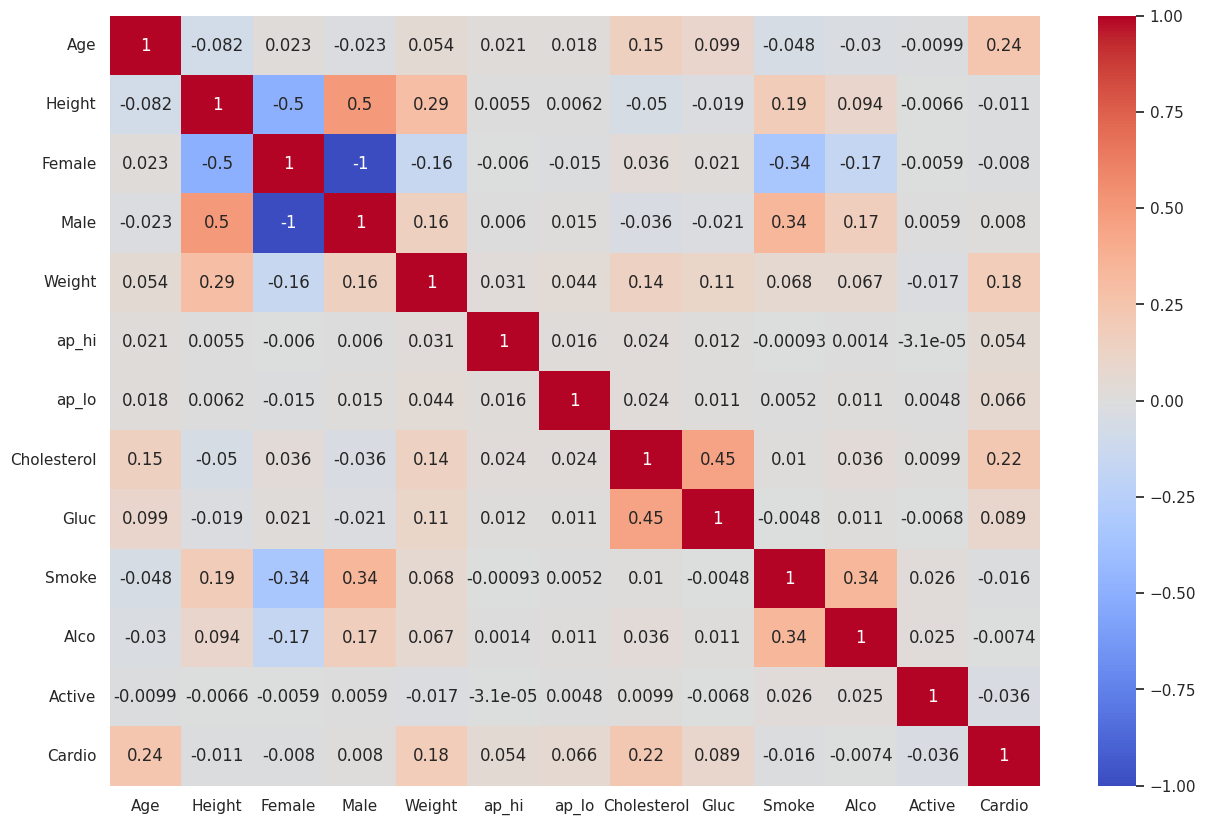

(<Axes: >, None)

In [9]:
plt.figure(figsize=(15,10))
sb.heatmap(heartdata.corr(), annot=True, cmap='coolwarm'),plt.show()

From this heatmap, we are able to form an understanding and evaluate some of the basic assumptions we made earlier. It can be easily seen that in terms of the "Cardio" variable which reflects Cardiovascular disease, there are no factors that are highly correlated to it individually. 

### This directly confirms that cardiovascular disease is a compound event that is affected dynamically by various factors instead of just an individual one.

This result thereby proves the relevance of using our model in trying to evaluate whether an individual is at cardiac risk or not.

However, it should also be noted that there are some factors which have a low degree of correlation that is relatively higher than the rest. These are:
1) Age with a correlation of 0.24

2) Weight with a correlation of 0.18

3) Cholesterol with a correlation of 0.22

We will attempt to try and reason out these variables through a few methods of data cleaning before evaluating our assumptions.

#### Now, moving out to data cleaning.

It can be clearly observed from the previous description of the data that the max and min data for height and weight represent values that are way off the height and weight spectrum, for example, individuals who are 250cm in height or individuals who weigh 10 kg.

However, in-order to make a current judgement for the removal of outliers, we should consider both these values together instead of looking at it separately

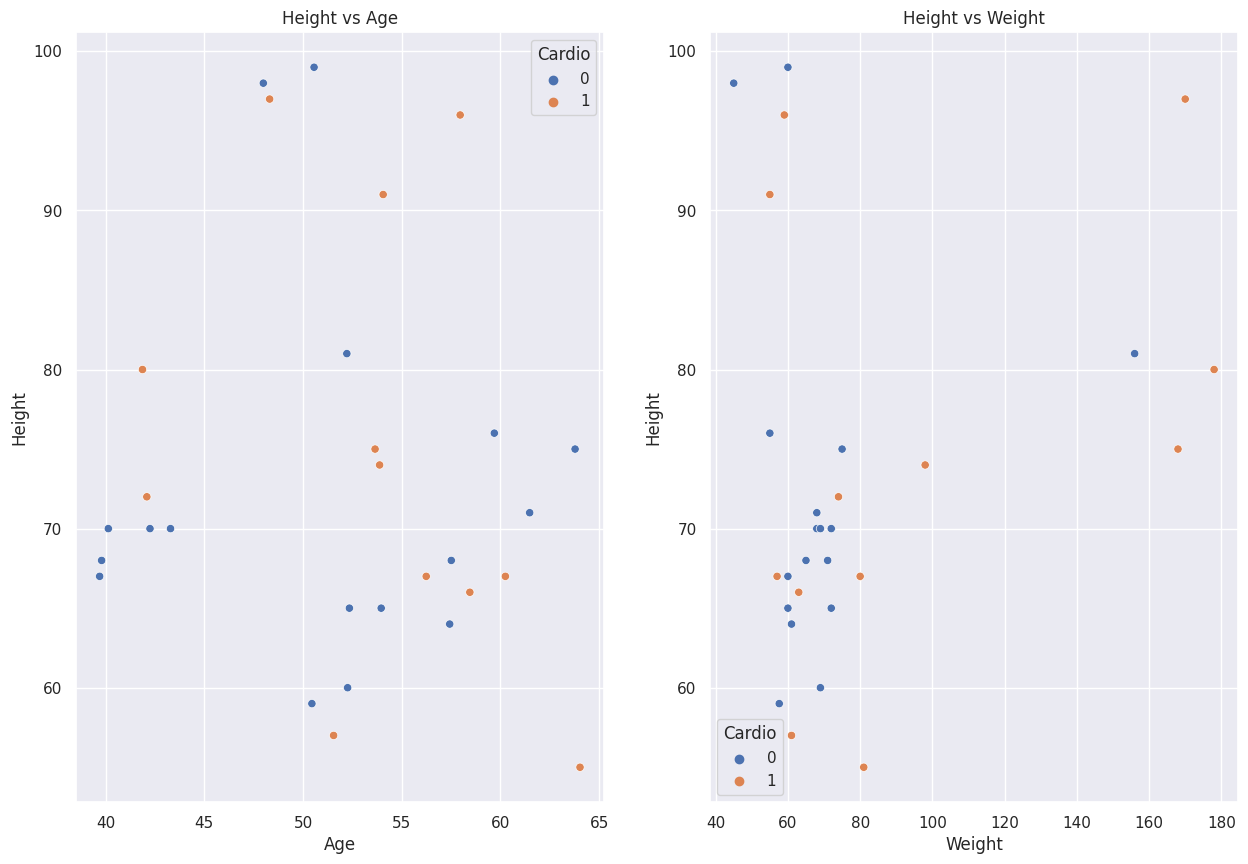

In [10]:
# To do so, we can view the data as a scatterplot to identify these potential outliers in a 2-Dimensional view
# Additionally, we can also compare these data points with the age of the respondents to see if they are very young children or much older adults

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))

sb.scatterplot(x = heartdata['Age'],y=heartdata['Height'][heartdata['Height']<100],hue=heartdata['Cardio'],ax=ax1)
ax1.set_title('Height vs Age')

sb.scatterplot(x = heartdata['Weight'],y=heartdata['Height'][heartdata['Height']<100],hue=heartdata['Cardio'],ax=ax2)
ax2.set_title('Height vs Weight')

plt.show()

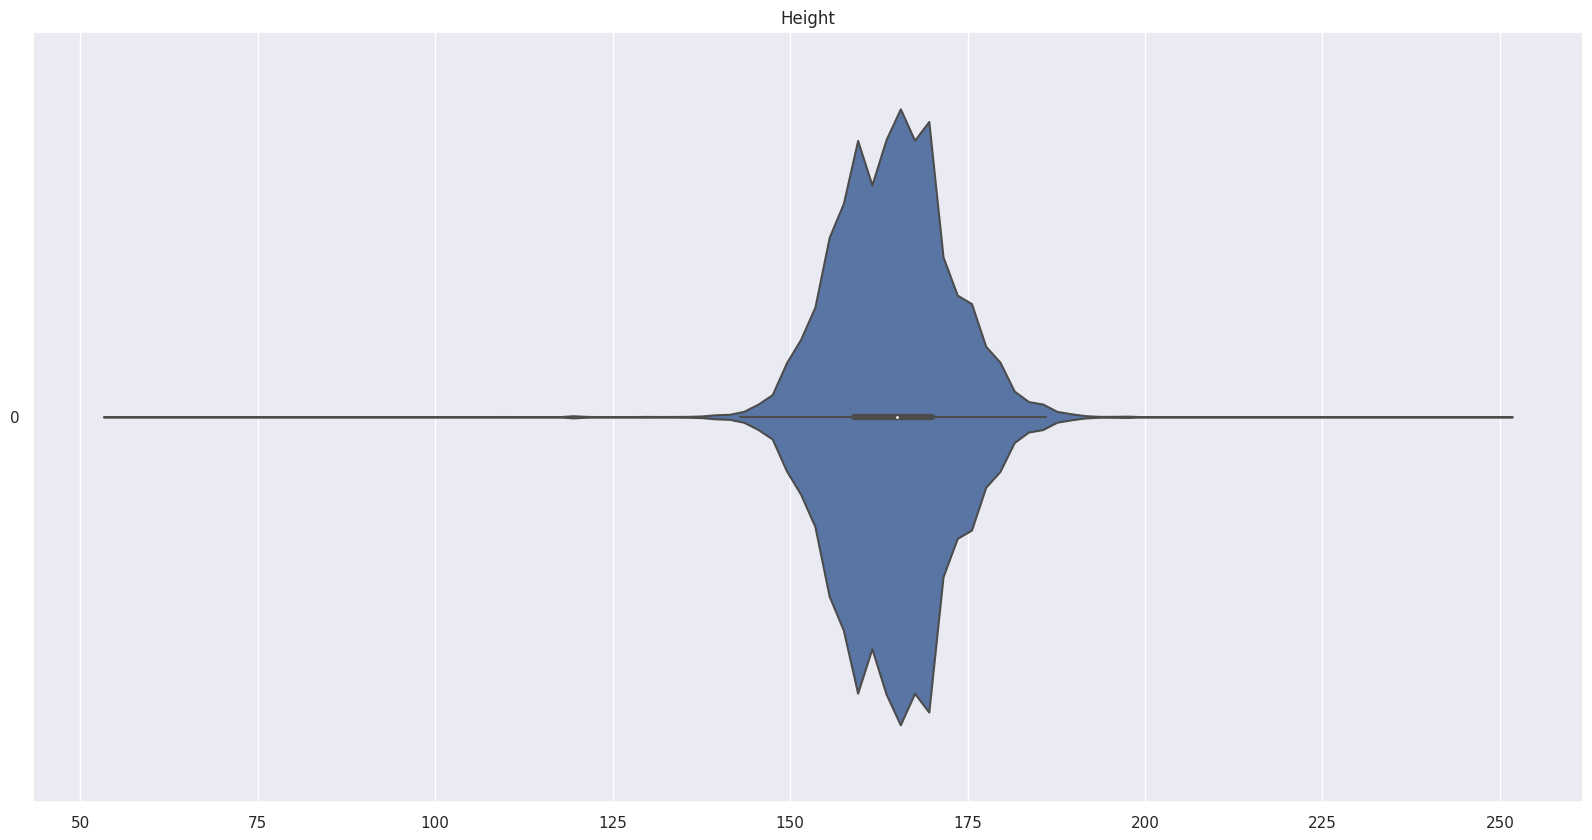

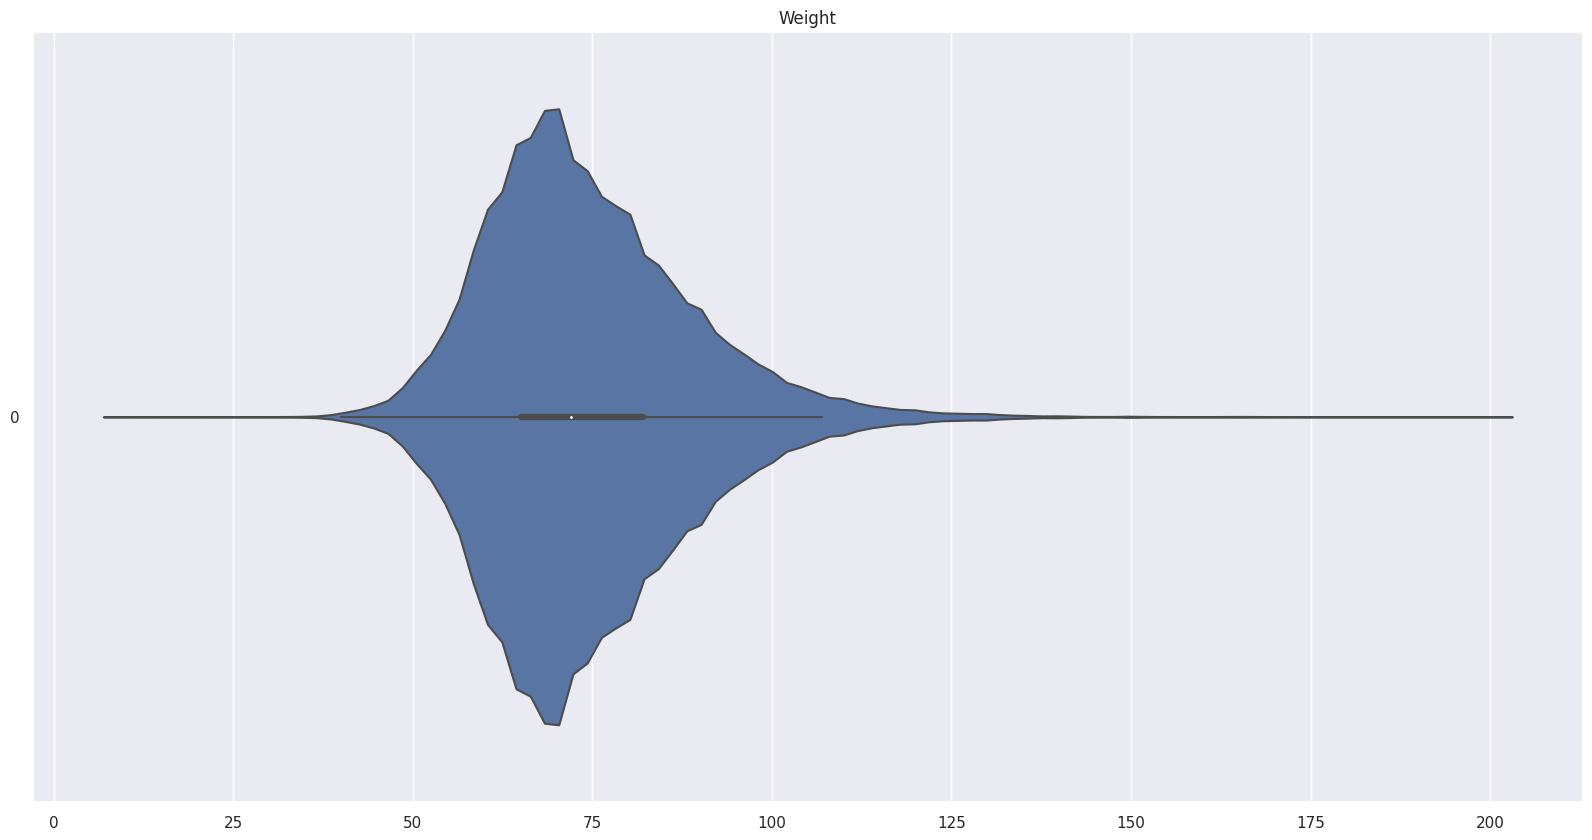

In [11]:
#Violinplot View of the Height and Weight Dataset
fig, (ax1) = plt.subplots(ncols=1, figsize=(20,10))

ax = sb.violinplot(data = heartdata["Height"], orient = "h", ax = ax1)

ax.set_title("Height")

plt.show()



fig, (ax2) = plt.subplots(ncols=1, figsize=(20,10))

ax3 = sb.violinplot(data = heartdata["Weight"], orient = "h", ax = ax2)

ax3.set_title("Weight")

plt.show()

From the above "Height vs Age" scatterplot, it is easy to see that for those who are below 140cm in height, they are aged above around 40 years old which is highly unlikely. Those above the 140cm height mark in the "Height" violin plot corroborates this result as can be seen by the density curve which tapers off around the 140cm mark on the left side and the 195cm mark on the right side. 

A similar story is seen for the "Height vs Weight" scatterplot. Furthermore, based off the "Weight" Violin Plot, some of them also weigh above 135kg or below 35kg which is highly unlikely. 


As such, it can be evaluated that these data point should be filtered out.

In [12]:
# Filter out these datasets

filter1 = (heartdata['Height'] > 195) | (heartdata['Height'] < 140) | (heartdata['Weight'] < 35) | (heartdata['Weight'] > 135)
outliers = list(heartdata[filter1].index)

heartdata.drop(index=outliers, inplace=True)

num_outliers_deleted = len(outliers)
print(f'{num_outliers_deleted} outliers due to height and weight have been deleted')
print(f'New shape of dataset: {heartdata.shape}')

322 outliers due to height and weight have been deleted
New shape of dataset: (69654, 13)


#### Next factor to consider when cleaning the dataset would be blood pressure indexes that are out of range. 

Based off health data, the following image reflects the different ranges of systolic and diastolic blood pressure:

![Blood Pressure Chart](https://raw.githubusercontent.com/sheldor07/dsai-mini-project/main/images/bloodpres.jpg)

Let's first print a basic boxplot and violinplot for systolic and diastolic blood pressure 

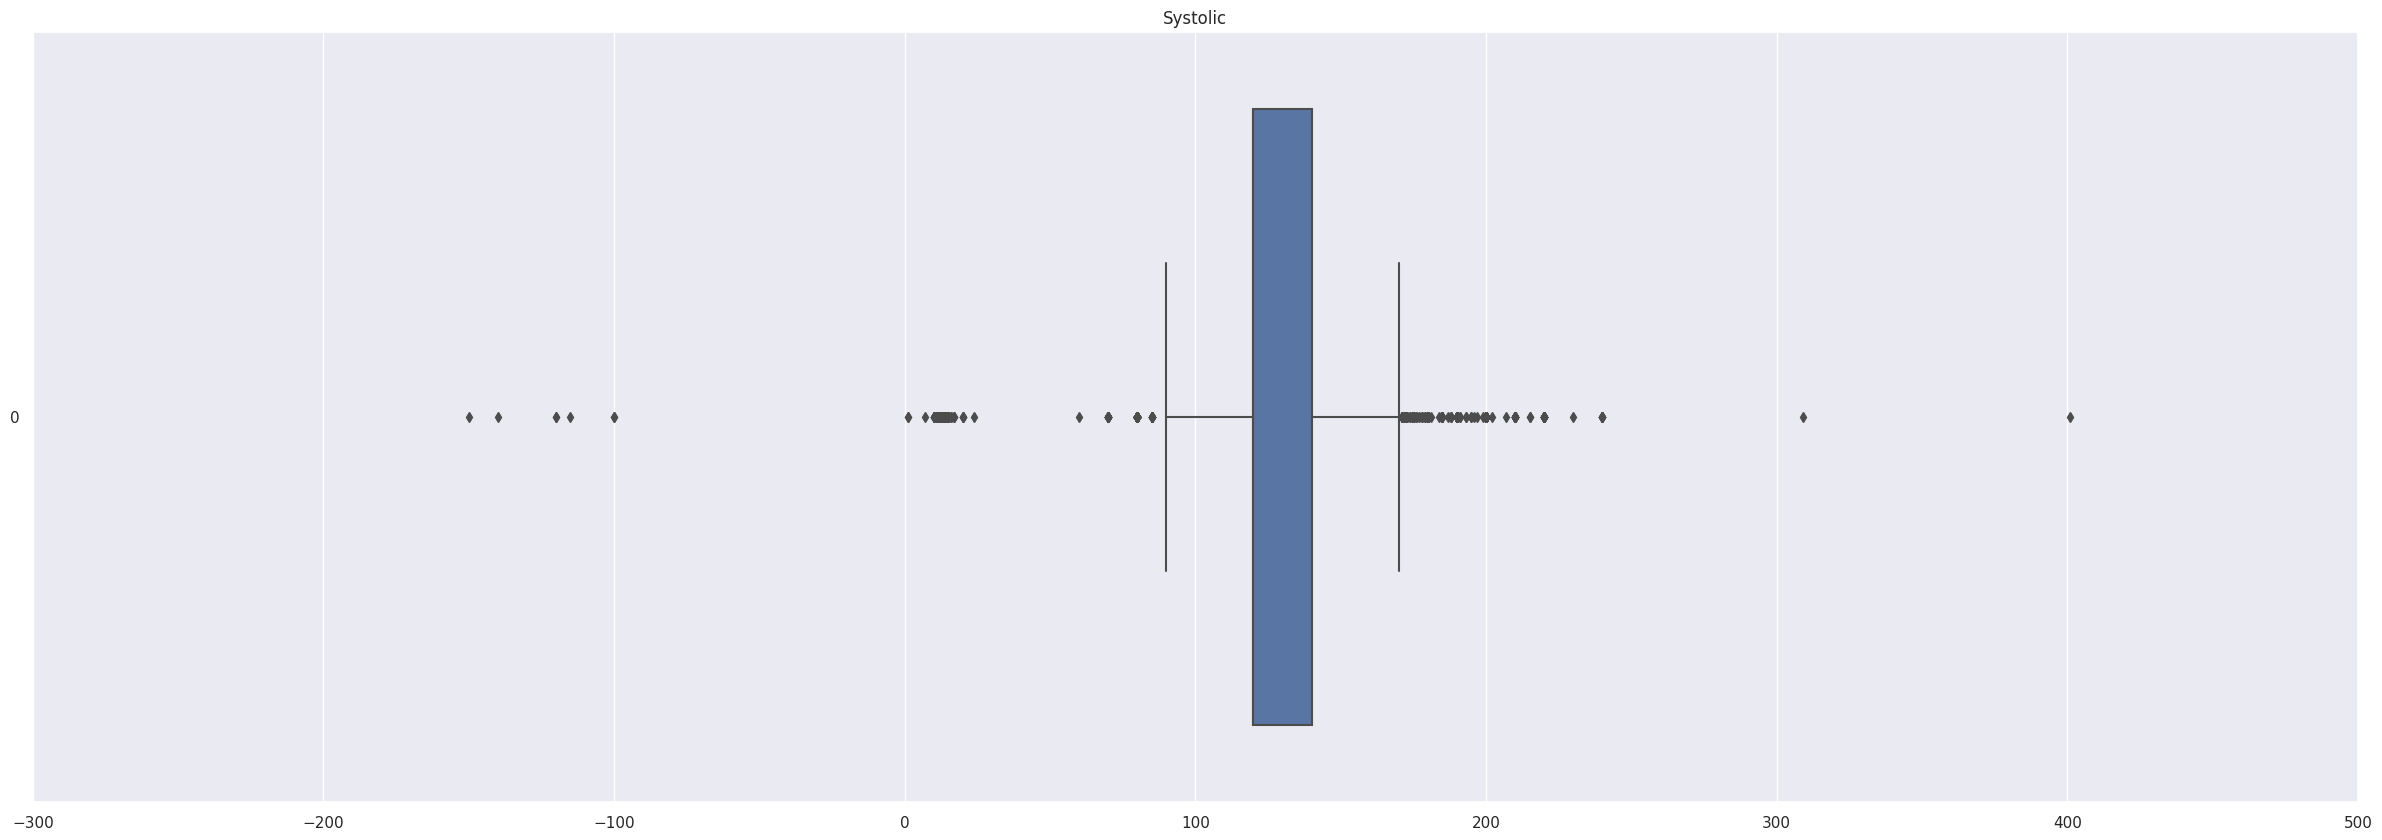

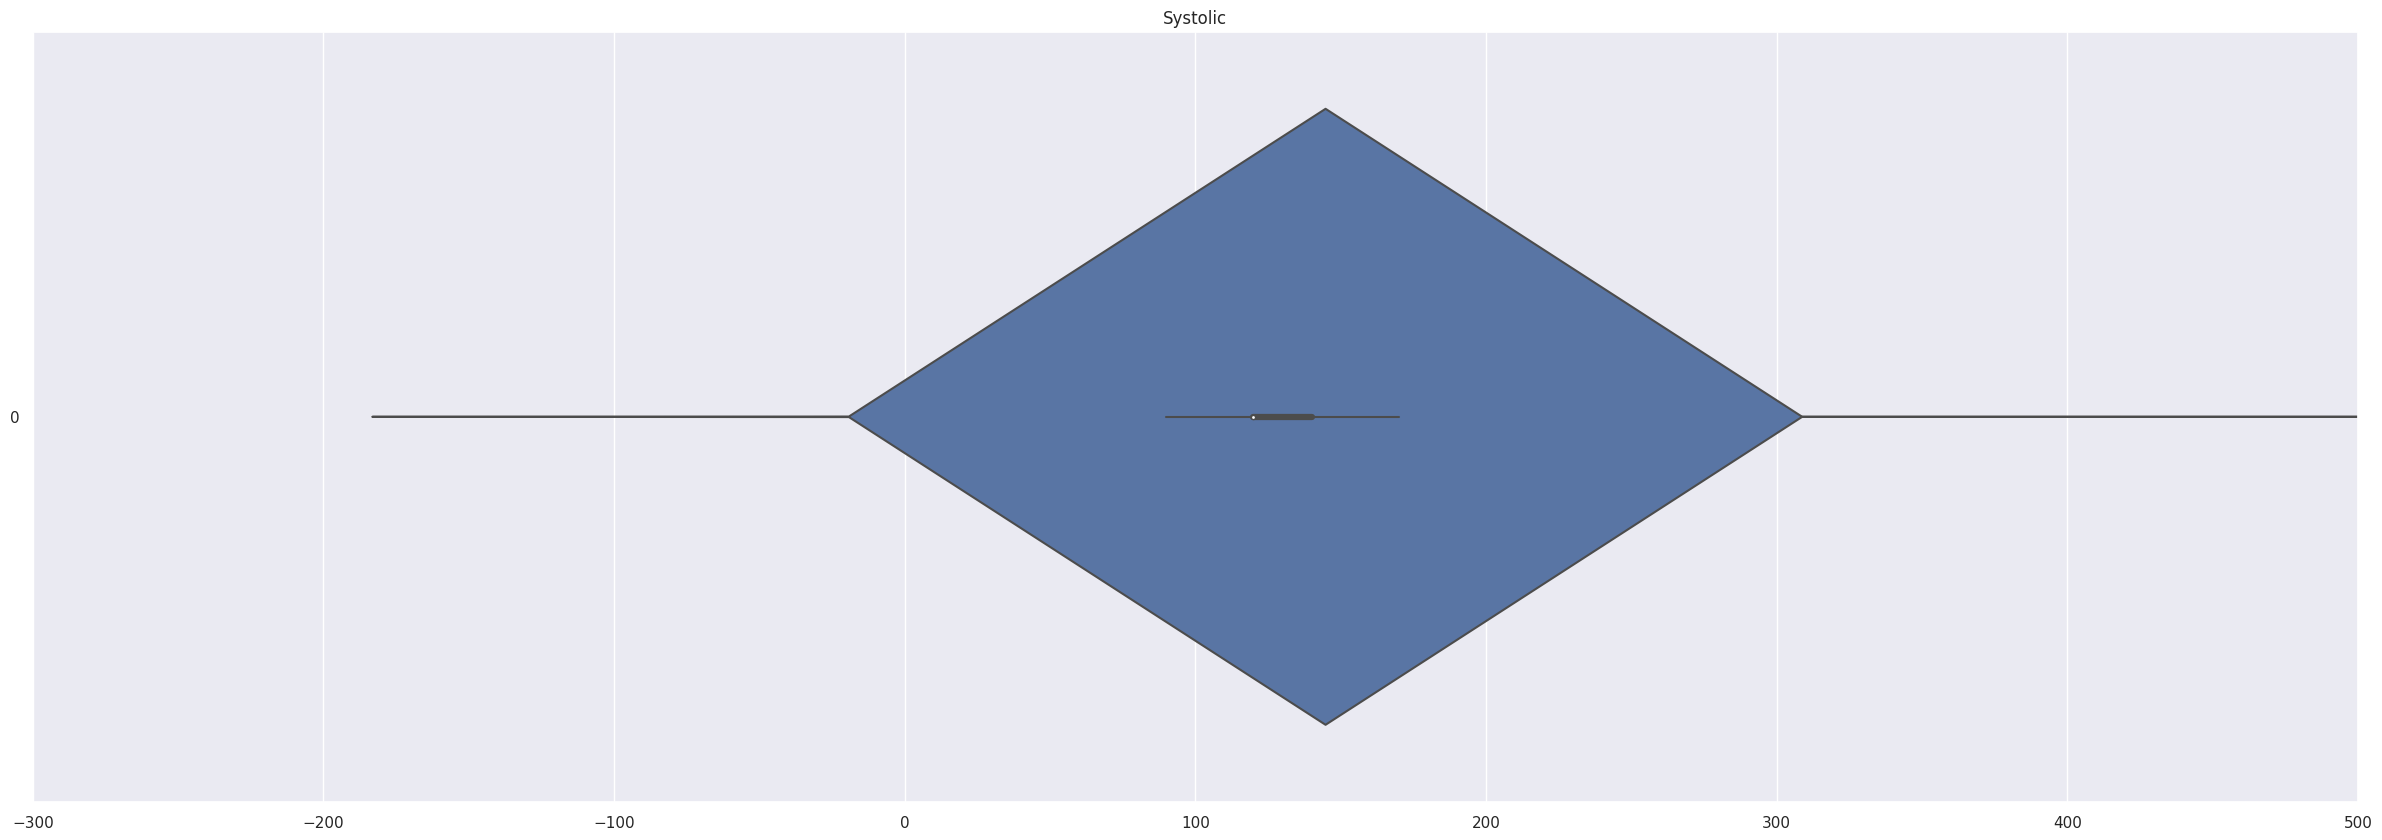

In [13]:
# Print boxplot and violinplot for systolic blood pressure

fig, (ax1) = plt.subplots(ncols=1, figsize=(30,10))

ax = sb.boxplot(data = heartdata["ap_hi"], orient = "h", ax = ax1)

ax.set_xlim(-300,500)

ax.set_title("Systolic")

plt.show()


fig, (ax2) = plt.subplots(ncols=1, figsize=(30,10))

ax2 = sb.violinplot(data = heartdata["ap_hi"], orient = "h", ax = ax2)

ax2.set_xlim(-300,500)

ax2.set_title("Systolic")

plt.show()

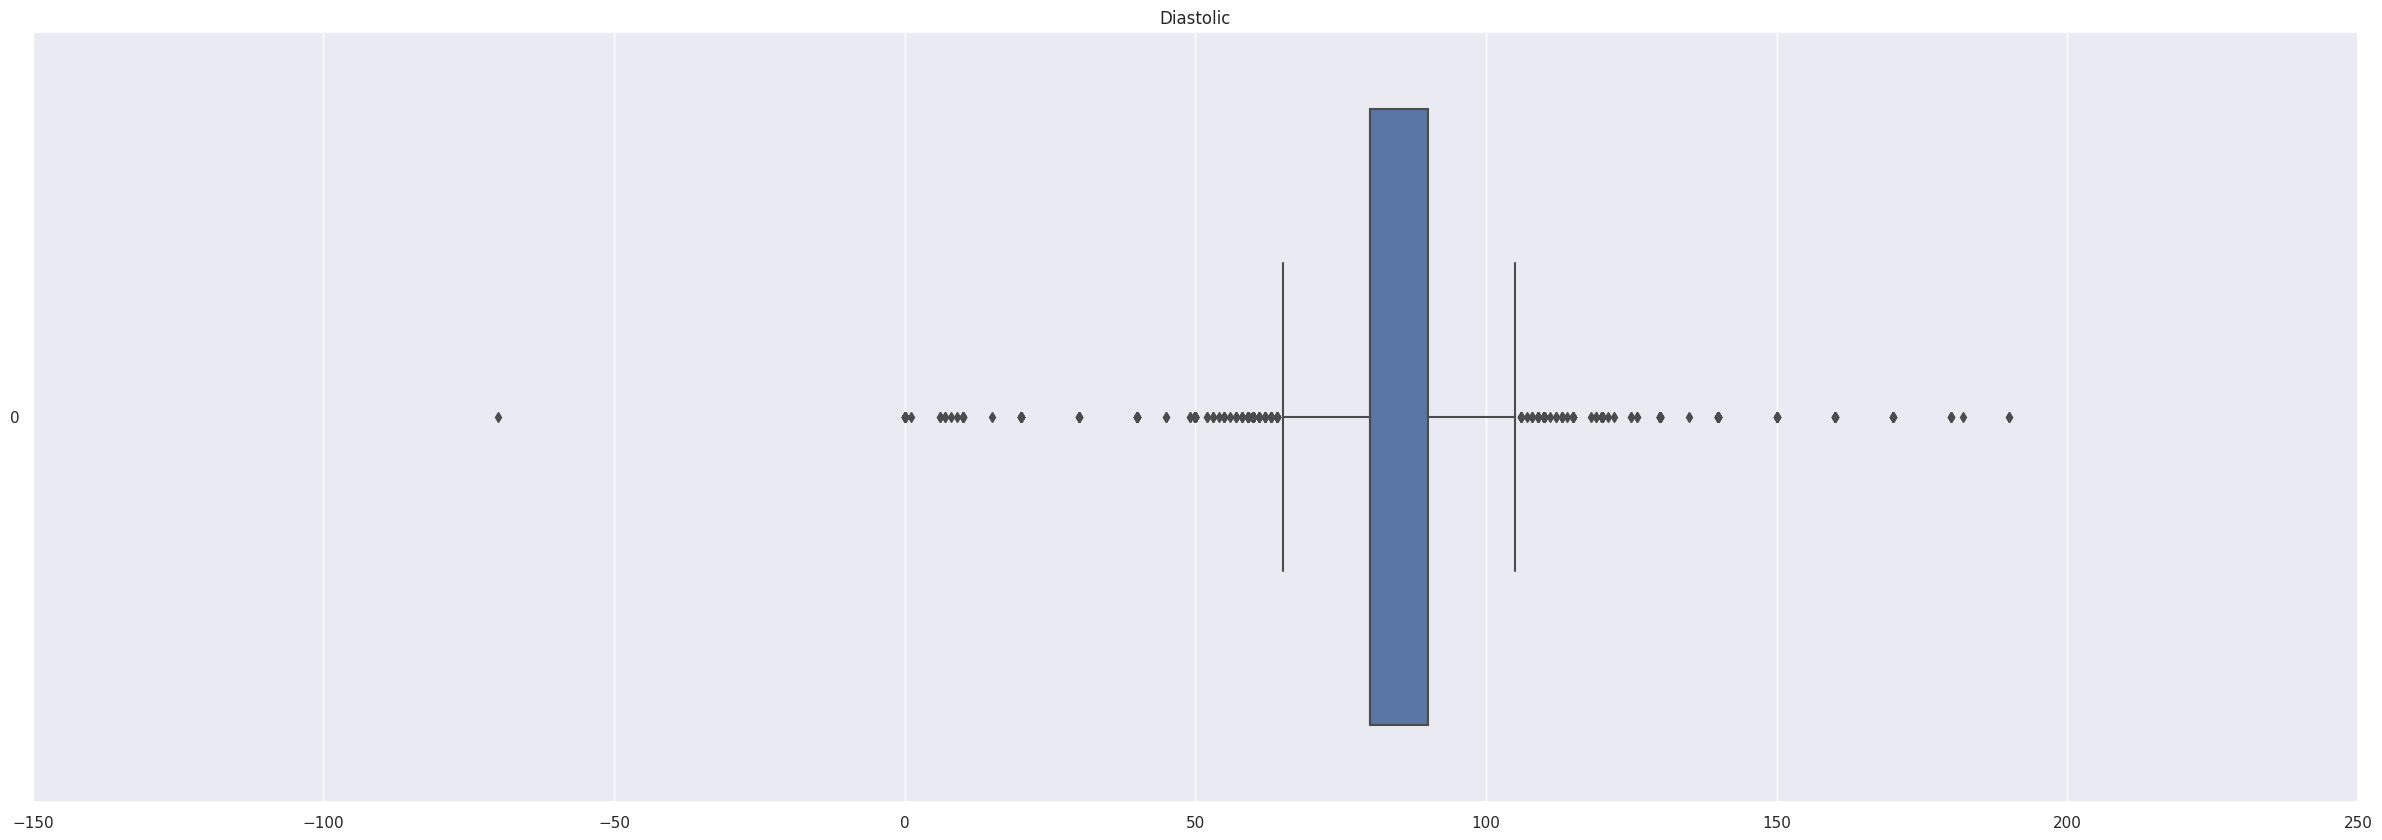

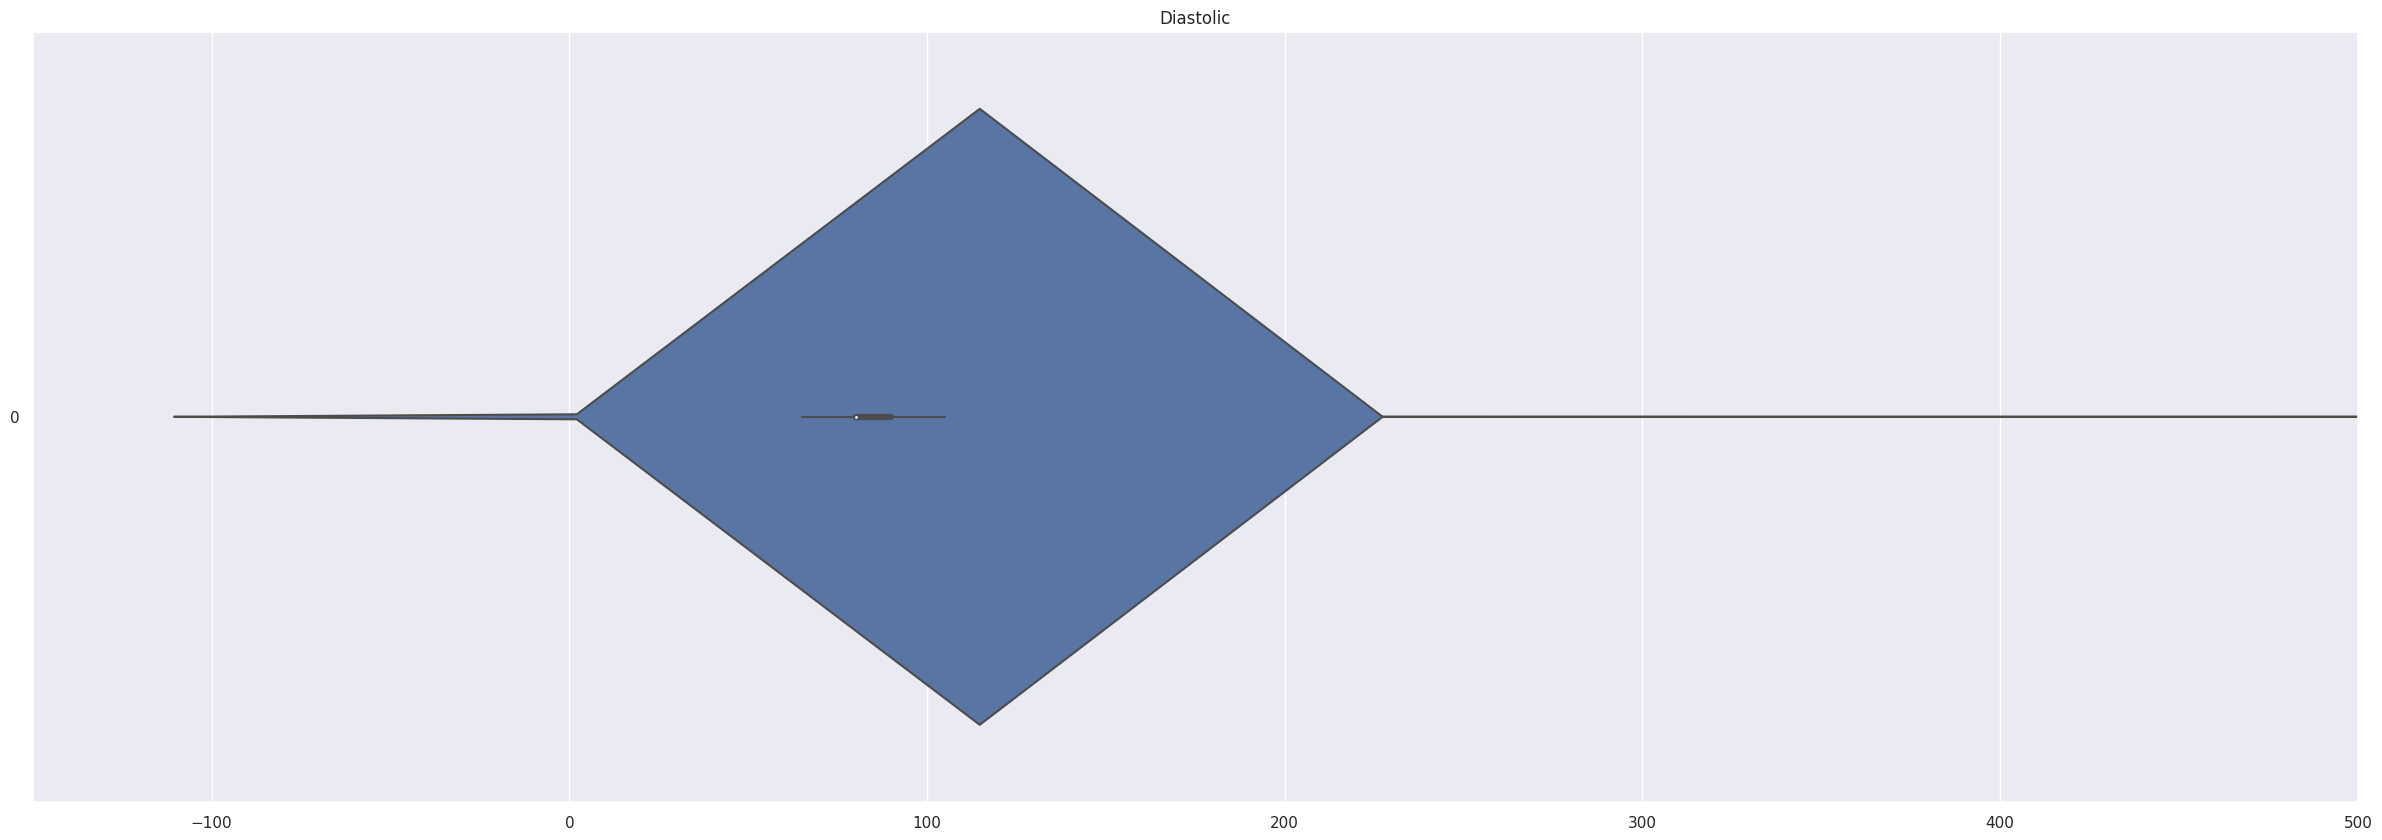

In [14]:
# Print boxplot and violinplot for diastolic blood pressure

fig, (ax3) = plt.subplots(ncols=1, figsize=(30,10))

ax3 = sb.boxplot(data = heartdata["ap_lo"], orient = "h", ax = ax3)

ax3.set_xlim(-150,250)

ax3.set_title("Diastolic")

plt.show()


fig, (ax4) = plt.subplots(ncols=1, figsize=(30,10))

ax4 = sb.violinplot(data = heartdata["ap_lo"], orient = "h", ax = ax4)

ax4.set_xlim(-150,500)

ax4.set_title("Diastolic")

plt.show()

![Range of Blood Pressure Chart](https://raw.githubusercontent.com/sheldor07/dsai-mini-project/main/images/bloodpres2.jpg)

##### Accounting for minor variations, we can give a +/-10mmHg headroom for all the characteristics

Therefore, data above 200 mmHg for systolic or below 80mmHg can be filtered out as outliers, and above 120 mmHg or below 50 for diastolic can be filtered out as outliers.

In [15]:
# Filter out data based off the above characteristics

filter2 = (heartdata['ap_hi'] > 200) | (heartdata['ap_hi'] < 90) | (heartdata['ap_lo'] > 120) | (heartdata['ap_lo'] < 50)
outliers2 = list(heartdata[filter2].index)

heartdata.drop(index=outliers2, inplace=True)

num_outliers_deleted2 = len(outliers2)
print(f'{num_outliers_deleted2} outliers due to blood pressure have been deleted')
print(f'New shape of dataset: {heartdata.shape}')

1479 outliers due to blood pressure have been deleted
New shape of dataset: (68175, 13)


In [16]:
# Basic data characteristics after the removal of outliers

heartdata.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,68175.0,53.29,6.76,29.56,48.35,53.94,58.39,64.92
Height,68175.0,164.45,7.77,140.00,159.00,165.00,170.00,195.00
Female,68175.0,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Male,68175.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Weight,68175.0,73.99,13.89,35.00,65.00,72.00,82.00,135.00
ap_hi,68175.0,126.61,16.38,90.00,120.00,120.00,140.00,200.00
ap_lo,68175.0,81.28,9.26,50.00,80.00,80.00,90.00,120.00
Cholesterol,68175.0,1.36,0.68,1.00,1.00,1.00,1.00,3.00
Gluc,68175.0,1.23,0.57,1.00,1.00,1.00,1.00,3.00
Smoke,68175.0,0.09,0.28,0.00,0.00,0.00,0.00,1.00


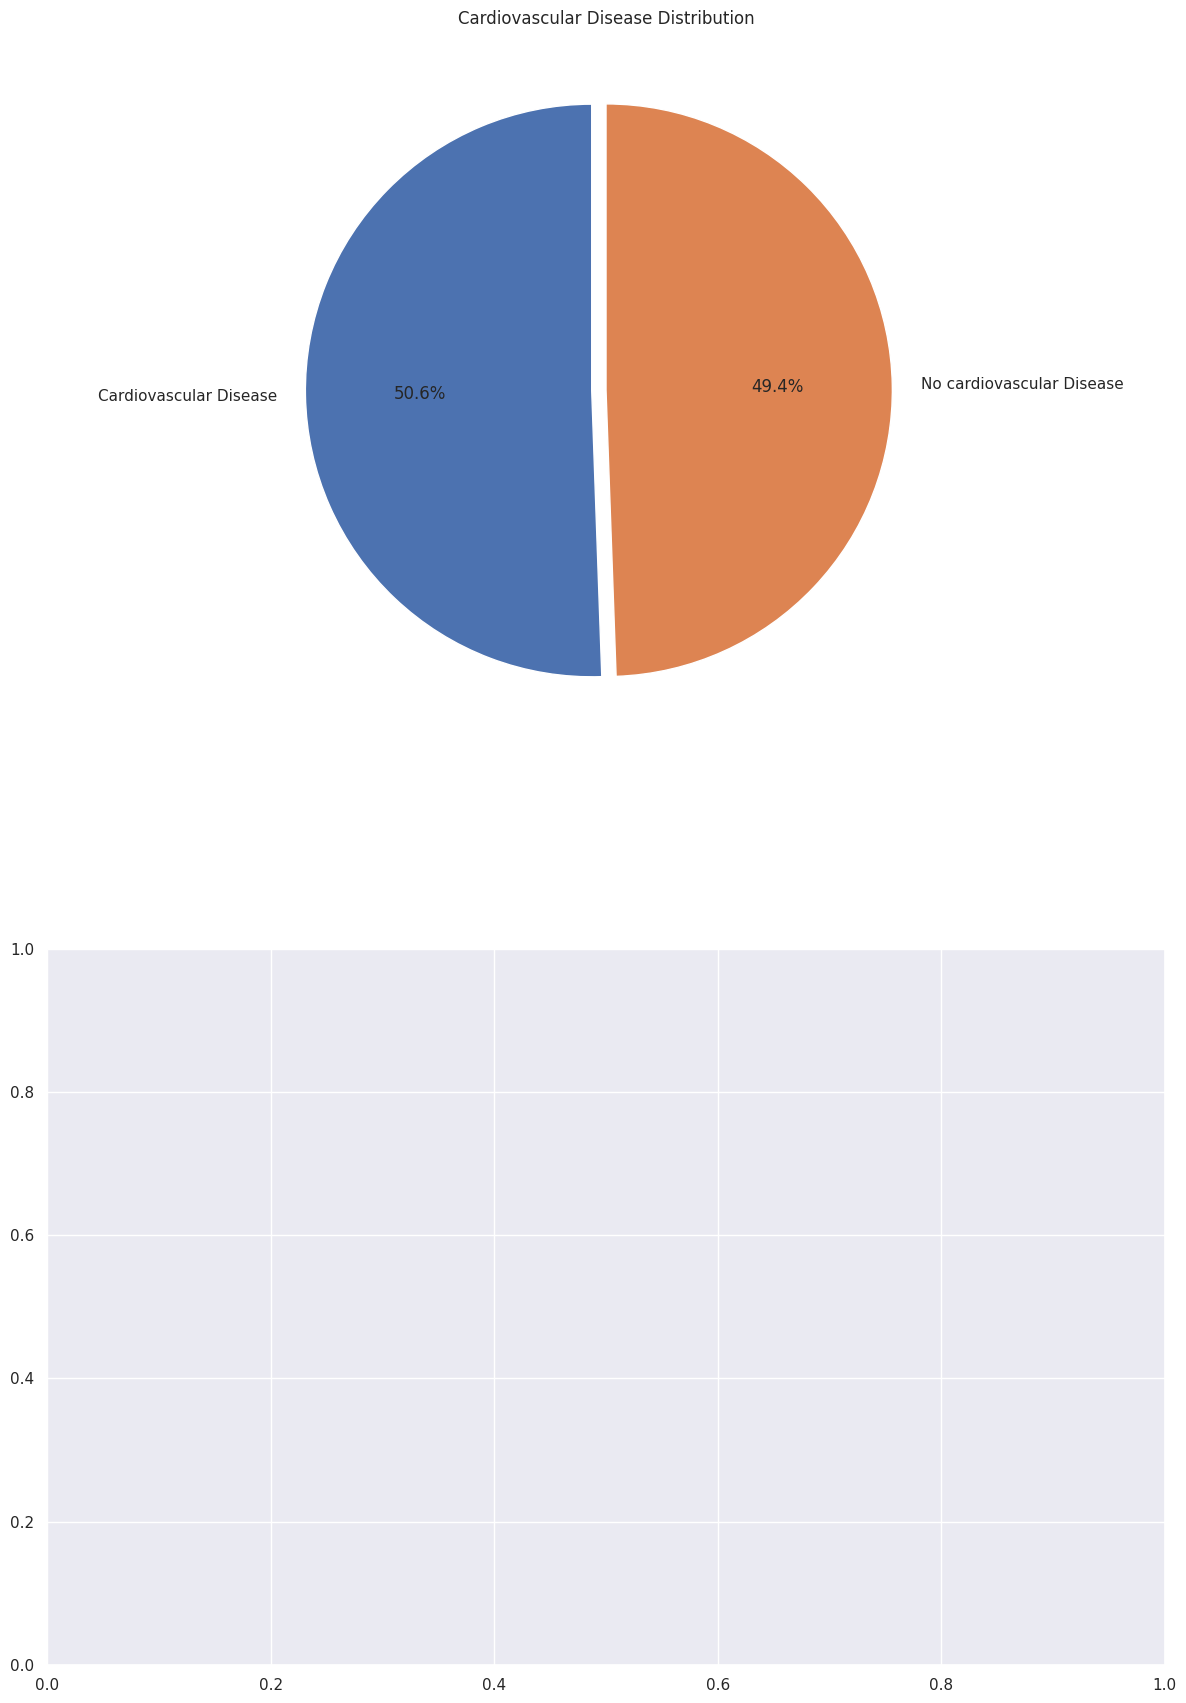

In [17]:
fig, ax = plt.subplots(2, figsize=(15,20))
plt.tight_layout(pad=10)
ax[0].pie(x=heartdata['Cardio'].value_counts(), labels=['Cardiovascular Disease', 'No cardiovascular Disease'],autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardiovascular Disease Distribution')

From this, we are able to identify certain key features:

- Mean age of patients: 19464.9/365 = 53 years and 3 months old
- Ratio of males to females - 35:65
- Mean height - 164.39cm
- Mean weight - 74.11kg
- Mean systolic blood pressure - 126.63
- Mean diastolic blood pressure - 81.29
- Percentage of smokers - 9%
- Percentage of alcoholics - 5%
- Percentage of participants who engage in sport activities - 80%
- Percentage of participants who have cardiovascular disease - 49%

Interestingly, the percentage of participants who have cardiovascular disease is exactly half as compared to participants who do not have cardiovascular disease. This is useful for the machine learning segment that will come later as it reduces the potential of classification bias which would originate if there is significantly more of one binary value over the other.

#### Now we can re-evaluate the dataset.

After carrying out the relevant data cleaning as shown above, we can re-print the correlation heatmap to see if there are any observable changes to the correlation values.

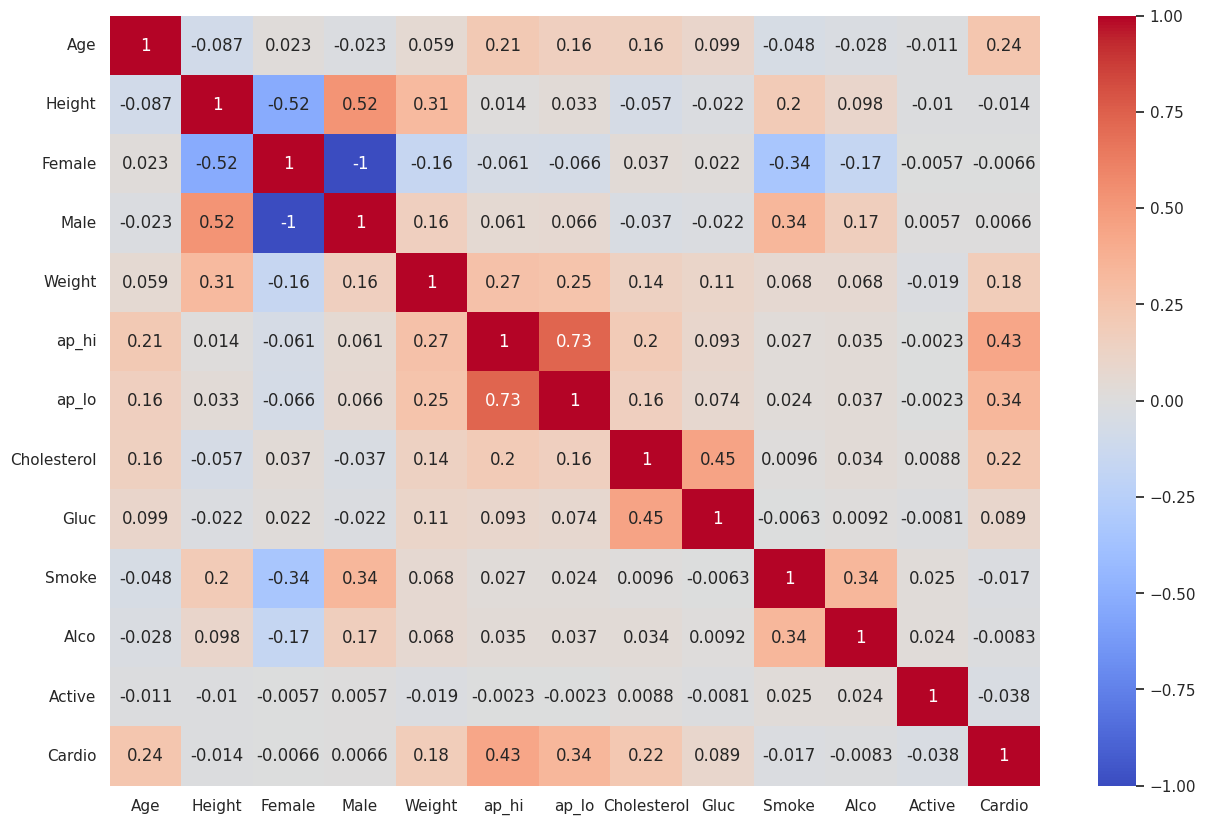

(<Axes: >, None)

In [18]:
cardiovascular_df = heartdata
plt.figure(figsize=(15,10))
sb.heatmap(cardiovascular_df.corr(), annot=True, cmap='coolwarm'),plt.show()

#### Changes

Wow, from this new heatmap reflecting the correlation values, we can clearly see some major changes. These are:

1) Variable "Ap_hi" correlation increasing from 0.054 to a moderate 0.43

2) Variable "Ap_lo" correlation increasing from 0.066 to 0.34

These changes indicate that systolic and diastolic blood pressure are also variables to take note of and play a relatively higher role than other variables in the effect on whether an individual will experience a cardiac incident or not. The variables of "Age", "Weight" and "Cholesterol" are also impactful

#### Assumptions

From this heatmap, we can now attempt to verify our previous assumptions before moving on to creating a model for our data. 
Our previous assumptions were:

1) The increase in age results in an increase in the chance of heart disease

2) The increase in cholesterol increaases the chance of heart disease

3) Smoking + Drinking habits increases the chance of heart disease

From the heatmap, we can conclude that all 3 assumptions are not completely valid. However, assumptions 1 and 2 are relatively higher in terms of validity which can be verified by a correlation of 0.24 for "Age" and 0.22 for "Cholesterol". 

Assumption 3 is proved to be completely invalid as smoking and alcohol seem to have close to 0 correlation. However, as this contrasts widely recognised empirical data and testaments about smoking and alcohol having a correlation with cardiovascular diseases, we can theorise that due to this being a categorical variable of "1" indicating consumes alcohol/smokes and "0" indicating does not consume alcohol/does not smoke, the extent to which an individual consumes alcohol or smokes is not taken into consideration. For example, an indidvidual who drinks alcohol but only in social settings, perhaps once a month, is indifferentiable from an individual who drinks regularly, perhaps once a day. Similarly for smoking as well. Therefore, the data columns are still valid but could be improved upon in the future by representing the data through a categorical approach that is not binary in nature.

# 3) Basic Data Modelling

Now that we have explored the dataset, let us prepare it for use in our machine learning model. We will start by splitting the dataset into training and testing sets. This will help us evaluate the performance of our model on data that it hasn't seen during training.", "reasoning": "By splitting the dataset into training and testing sets, it allows us to evaluate the performance of our model on data it hasn't seen before. This helps to determine whether the model is overfitting, which occurs when the algorithm is too complex and captures the noise in the data instead of the underlying patterns.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
def get_training_data():
  target = heartdata['Cardio'].values
  features = heartdata.drop(['Cardio'], axis=1).values
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
  return features_train, features_test, target_train, target_test


## Model 1- Logistic Regression

We are now ready to build and train a machine learning model. Given that our target variable is binary, meaning that a person either has a cardiovascular disease or doesn't have one, we will be using a binary classification algorithm such as Logistic Regression.

The dependent variable of whether a person has cardiovascular disease or not is categorical. In view of this, logistic binary regression is deemed a suitable model.

Logistic Regression uses a Sigmoid function to produce a probability between 0 to 1, and 0 and 1 are used to classify whether a person has cardiovascular disease or not.

Logistic regression is good because it is able to factor in multiple variables such as the person's height and weight to give a prediction. It is not based on the assumption that data points that are located close together have similar characteristics. Also, it is a very efficient model that can make predictions fast.

Its limitations are that it assumes linearity between variables, which affects its prediction accuracy if the dependent and independent variables do not hold a linear relationship.

We will use the logistic regression function in sklearn to do the logistic regression and evaluate if it is suitable for use based on its classification accuracy.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#check shape


#convert to dataframe
heartdata.describe()

#predicting cardio using 
y = pd.DataFrame(heartdata['Cardio'])
X = pd.DataFrame(heartdata[['Active','Alco','Smoke','Gluc','Cholesterol','Age','Weight','Height','ap_lo','ap_hi']])
print(y.shape)
print(X.shape)
def get_data(y):
    y=y["Cardio"].values.reshape(-1,1)
    features_train, features_test, target_train, target_test = train_test_split(X, y, test_size = 0.3)
    return features_train, features_test, target_train, target_test

(68175, 1)
(68175, 10)


In [21]:
#on train data
features_train, features_test, target_train, target_test = get_data(y)

              precision    recall  f1-score   support

   No Cardio       0.71      0.79      0.74     10433
      Cardio       0.75      0.66      0.70     10020

    accuracy                           0.72     20453
   macro avg       0.73      0.72      0.72     20453
weighted avg       0.73      0.72      0.72     20453

Accuracy  :	 0.7288043250492435

TPR Train :	 0.6709309689677011
TNR Train :	 0.7858301784748513

FPR Train :	 0.21416982152514874
FNR Train :	 0.3290690310322989


<Axes: >

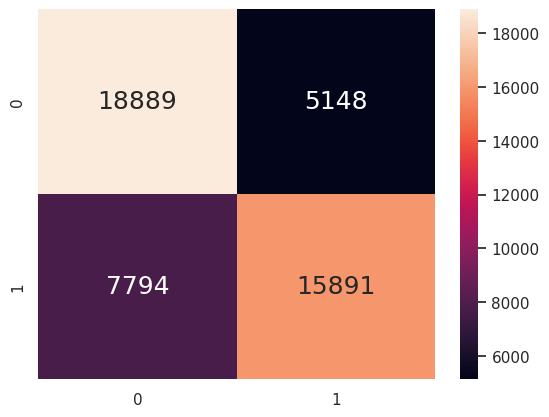

In [22]:
#Logistic Regression and its evaluation
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
lreg = LogisticRegression(max_iter=100000)

lreg.fit(features_train,target_train.ravel())
prdt = lreg.predict(features_test)
print(classification_report(target_test,prdt,target_names = ['No Cardio', 'Cardio']))

pred = lreg.predict(features_train)

print("Accuracy  :\t", lreg.score(features_train, target_train))
print()

cm_train = confusion_matrix(target_train, pred)
tp_train = cm_train[1][1] # True Positives : Y (1) predicted Y (1)
fp_train = cm_train[0][1] # False Positives : N (0) predicted Y (1)
tn_train = cm_train[0][0] # True Negatives : N (0) predicted N (0)
fn_train = cm_train[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tp_train/(tp_train + fn_train)))
print("TNR Train :\t", (tn_train/(tn_train + fp_train)))
print()

print("FPR Train :\t", (fp_train/(tn_train + fp_train)))
print("FNR Train :\t", (fn_train/(tp_train + fn_train)))

sb.heatmap(confusion_matrix(target_train, pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


From the above, logistic regression model has an accuracy of 72.7% in predicting whether the person has a cardiovascular disease. 

## Model 2- Classification Tree
As we would like to predict if a person has cardiovascular disease or not, it would be suitable to do classification via a classification tree.

It is able to provide us with data that can be omitted from the dataset through the gini index to further improve on prediction accuracy.

Classification tree is based on a "greedy" strategy, which may not produce the optimal results.

To do this, we will use decision tree classifier function from sklearn library. The classification tree will be illustrated with their gini coefficients shown. The gini coefficient gives the probability of wrongly classifying the data point, hence a lower gini is better. We will do 2 layers of classication tree.

In [23]:
#classification tree 
#train
heartdata.describe()



#sample sizes
print("Train Set :", features_train.shape, target_train.shape)
print("Test Set  :", features_test.shape, target_test.shape)

#4 layer tree on train
train_d4 = DecisionTreeClassifier(max_depth = 2)
train_d4.fit(features_train,target_train)
f = plt.figure(figsize=(100,100))

plot_tree(train_d4, filled=True, rounded=True, 
          feature_names=features_train.columns, 
          fontsize=45,
          class_names=["N","Y"])

Train Set : (47722, 10) (47722, 1)
Test Set  : (20453, 10) (20453, 1)


[Text(0.5, 0.8333333333333334, 'ap_hi <= 129.5\ngini = 0.5\nsamples = 47722\nvalue = [24037, 23685]\nclass = N'),
 Text(0.25, 0.5, 'Age <= 54.745\ngini = 0.433\nsamples = 28470\nvalue = [19432, 9038]\nclass = N'),
 Text(0.125, 0.16666666666666666, 'gini = 0.365\nsamples = 17605\nvalue = [13384, 4221]\nclass = N'),
 Text(0.375, 0.16666666666666666, 'gini = 0.494\nsamples = 10865\nvalue = [6048, 4817]\nclass = N'),
 Text(0.75, 0.5, 'ap_hi <= 138.5\ngini = 0.364\nsamples = 19252\nvalue = [4605, 14647]\nclass = Y'),
 Text(0.625, 0.16666666666666666, 'gini = 0.479\nsamples = 6441\nvalue = [2563, 3878]\nclass = Y'),
 Text(0.875, 0.16666666666666666, 'gini = 0.268\nsamples = 12811\nvalue = [2042, 10769]\nclass = Y')]

Accuracy  :	 0.7141150831901429

TPR Train :	 0.6184082752797129
TNR Train :	 0.808420351957399

FPR Train :	 0.191579648042601
FNR Train :	 0.38159172472028713


<Axes: >

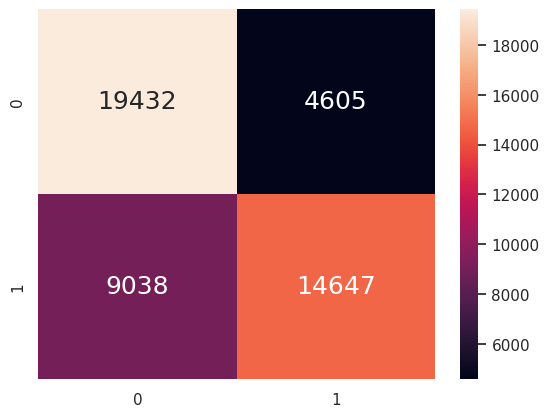

In [24]:
#check accuracy
from sklearn.metrics import confusion_matrix

target_pred = train_d4.predict(features_train)

print("Accuracy  :\t", train_d4.score(features_train, target_train))
print()

cm_train = confusion_matrix(target_train, target_pred)
tp_train = cm_train[1][1] # True Positives : Y (1) predicted Y (1)
fp_train = cm_train[0][1] # False Positives : N (0) predicted Y (1)
tn_train = cm_train[0][0] # True Negatives : N (0) predicted N (0)
fn_train = cm_train[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tp_train/(tp_train + fn_train)))
print("TNR Train :\t", (tn_train/(tn_train + fp_train)))
print()

print("FPR Train :\t", (fp_train/(tn_train + fp_train)))
print("FNR Train :\t", (fn_train/(tp_train + fn_train)))

sb.heatmap(confusion_matrix(target_train, target_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [25]:
# 2 layer test
train_d4 = DecisionTreeClassifier(max_depth = 2)
train_d4.fit(features_train,target_train)
f = plt.figure(figsize=(100,100))
plot_tree(train_d4, filled=True, rounded=True, 
          feature_names=features_test.columns, 
          fontsize=45,
          class_names=["N","Y"])


[Text(0.5, 0.8333333333333334, 'ap_hi <= 129.5\ngini = 0.5\nsamples = 47722\nvalue = [24037, 23685]\nclass = N'),
 Text(0.25, 0.5, 'Age <= 54.745\ngini = 0.433\nsamples = 28470\nvalue = [19432, 9038]\nclass = N'),
 Text(0.125, 0.16666666666666666, 'gini = 0.365\nsamples = 17605\nvalue = [13384, 4221]\nclass = N'),
 Text(0.375, 0.16666666666666666, 'gini = 0.494\nsamples = 10865\nvalue = [6048, 4817]\nclass = N'),
 Text(0.75, 0.5, 'ap_hi <= 138.5\ngini = 0.364\nsamples = 19252\nvalue = [4605, 14647]\nclass = Y'),
 Text(0.625, 0.16666666666666666, 'gini = 0.479\nsamples = 6441\nvalue = [2563, 3878]\nclass = Y'),
 Text(0.875, 0.16666666666666666, 'gini = 0.268\nsamples = 12811\nvalue = [2042, 10769]\nclass = Y')]

Accuracy  :	 0.7094802718427614

TPR Train :	 0.6127744510978044
TNR Train :	 0.8023579028083965

FPR Train :	 0.19764209719160356
FNR Train :	 0.3872255489021956


<Axes: >

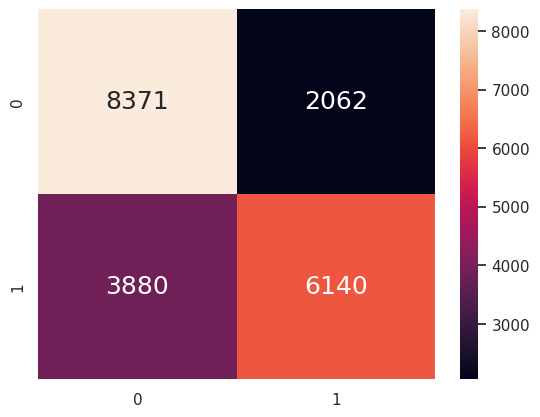

In [26]:
#check accuracy on test set
from sklearn.metrics import confusion_matrix

target_pred = train_d4.predict(features_test)

print("Accuracy  :\t", train_d4.score(features_test, target_test))
print()

cm_train = confusion_matrix(target_test, target_pred)
tp_train = cm_train[1][1] # True Positives : Y (1) predicted Y (1)
fp_train = cm_train[0][1] # False Positives : N (0) predicted Y (1)
tn_train = cm_train[0][0] # True Negatives : N (0) predicted N (0)
fn_train = cm_train[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tp_train/(tp_train + fn_train)))
print("TNR Train :\t", (tn_train/(tn_train + fp_train)))
print()

print("FPR Train :\t", (fp_train/(tn_train + fp_train)))
print("FNR Train :\t", (fn_train/(tp_train + fn_train)))

sb.heatmap(confusion_matrix(target_test, target_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

From the above, a 2 layer classification tree is able to predict up to 71.3% accuracy.

As can be observed in the classification tree Age has the biggest influence in the prediction outcome.

# 3) Advanced Data Modelling

## Model 1 - Random Forest Algorithm

Let us use the Random Forest algorithm to generate a model. Random Forest is a versatile and powerful algorithm that can be used for classification problems, and it works especially well with large datasets. It is also a robust algorithm that can handle noisy data and variable inputs with minimal tuning.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load data
features_train, features_test, target_train, target_test = get_training_data()
# Train and fit model
rf_clf = RandomForestClassifier()
rf_clf.fit(features_train, target_train)
# Make predictions
target_pred = rf_clf.predict(features_test)
# Evaluate model
acc_score = round(accuracy_score(target_test, target_pred)*100, 2)
print(f'Model accuracy score: {acc_score}%')

Model accuracy score: 71.09%


Now that we have built and trained our model, let us evaluate its performance on the testing set. We will use several metrics to evaluate the performance of our model, such as accuracy, precision, recall, and F1-score.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, features_test, target_test):
   target_pred = model.predict(features_test)
   acc_score = round(accuracy_score(target_test, target_pred)*100, 2)
   prec_score = round(precision_score(target_test, target_pred)*100, 2)
   rec_score = round(recall_score(target_test, target_pred)*100, 2)
   f1 = round(f1_score(target_test, target_pred)*100, 2)
   print(f'Model accuracy: {acc_score}%')
   print(f'Precision score: {prec_score}%')
   print(f'Recall score: {rec_score}%')
   print(f'F1 score: {f1}%')

# Assume you have already trained the model and it is stored in 'rf_clf'
# Evaluate the model without storing it
evaluate_model(rf_clf, features_test, target_test)

Model accuracy: 71.09%
Precision score: 71.28%
Recall score: 68.74%
F1 score: 69.99%


## Model 2 - K-Nearest Neighbours (KNN) Classification

KNN is based on the assumption that things that have similar characteristics will be located closer to one another.  K, the number of “neighbours” (data points), to pick is determined by the user. Thereafter, the distance from the point that we are trying to predict to each of the neighbours are calculated and the predicted point will take the classification of the most common classification of the neighbours.

By having a very small number of neighours, it could lead to high variance and low bias, which denotes overfitting. By having a large number of neighbours, it could lead to high bias and low variance, which denotes underfitting.

We will use the KNN classifier function from sklearn library to perform this classification. We will first split the data up into training and test set and then train the model. Thereafter, we will make predictions using the model and evaluate if it is suitable based on the accuracy of prediction. We will use a confusion matrix to visualise the predictions.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


dokNN is a function made for reusability when varying the k-values.

In [30]:
def dokNN(ne,prnt=True):
        
    knnc = KNeighborsClassifier(n_neighbors=ne,)

    #scaling 
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(features_train)

    X_train = scaler.transform(features_train)
    X_test = scaler.transform(features_test)
    
    knnc.fit(X_train,target_train.ravel())
    knnc_pred = knnc.predict(X_test)
    
    if not prnt:
        return knnc.score(X_test, target_test)
    #print(confusion_matrix(target_test, knnc_pred))
    print(classification_report(target_test, knnc_pred))
    
    print("Accuracy  :\t", knnc.score(X_test, target_test))
    print()

    cm_train = confusion_matrix(target_test, knnc_pred)
    tp_train = cm_train[1][1] # True Positives : Y (1) predicted Y (1)
    fp_train = cm_train[0][1] # False Positives : N (0) predicted Y (1)
    tn_train = cm_train[0][0] # True Negatives : N (0) predicted N (0)
    fn_train = cm_train[1][0] # False Negatives : Y (1) predicted N (0)

    print("TPR Train :\t", (tp_train/(tp_train + fn_train)))
    print("TNR Train :\t", (tn_train/(tn_train + fp_train)))
    print()
    
    print("FPR Train :\t", (fp_train/(tn_train + fp_train)))
    print("FNR Train :\t", (fn_train/(tp_train + fn_train)))

    sb.heatmap(confusion_matrix(target_test, knnc_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    return knnc.score(X_test, target_test)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     10424
           1       0.68      0.66      0.67     10029

    accuracy                           0.68     20453
   macro avg       0.68      0.68      0.68     20453
weighted avg       0.68      0.68      0.68     20453

Accuracy  :	 0.67686891898499

TPR Train :	 0.6570944261641241
TNR Train :	 0.6958940905602455

FPR Train :	 0.3041059094397544
FNR Train :	 0.34290557383587594


0.67686891898499

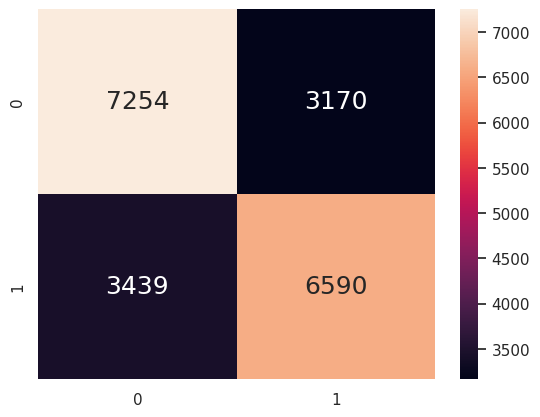

In [31]:
#3 neighbours
dokNN(3)

              precision    recall  f1-score   support

           0       0.69      0.72      0.70     10424
           1       0.69      0.67      0.68     10029

    accuracy                           0.69     20453
   macro avg       0.69      0.69      0.69     20453
weighted avg       0.69      0.69      0.69     20453

Accuracy  :	 0.6914878013005427

TPR Train :	 0.6651710040881443
TNR Train :	 0.7168073676132003

FPR Train :	 0.2831926323867997
FNR Train :	 0.3348289959118556


0.6914878013005427

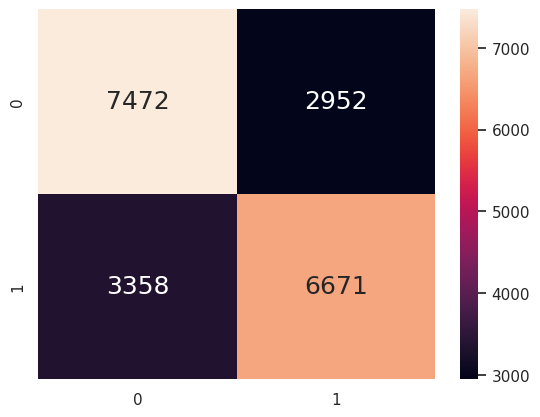

In [32]:
#5 neighours
dokNN(5)

              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10424
           1       0.74      0.63      0.68     10029

    accuracy                           0.71     20453
   macro avg       0.71      0.71      0.71     20453
weighted avg       0.71      0.71      0.71     20453

Accuracy  :	 0.7091869163447905

TPR Train :	 0.6311696081364044
TNR Train :	 0.784247889485802

FPR Train :	 0.21575211051419801
FNR Train :	 0.36883039186359556


0.7091869163447905

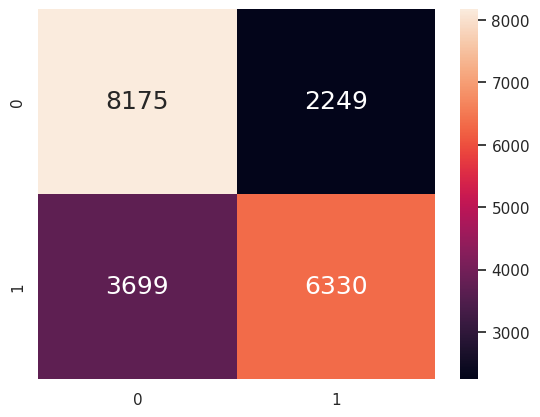

In [33]:
#10 neighbours
dokNN(10)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10424
           1       0.72      0.67      0.70     10029

    accuracy                           0.71     20453
   macro avg       0.72      0.71      0.71     20453
weighted avg       0.72      0.71      0.71     20453

Accuracy  :	 0.7149562411382193

TPR Train :	 0.6746435337521188
TNR Train :	 0.7537413660782809

FPR Train :	 0.24625863392171912
FNR Train :	 0.32535646624788117


0.7149562411382193

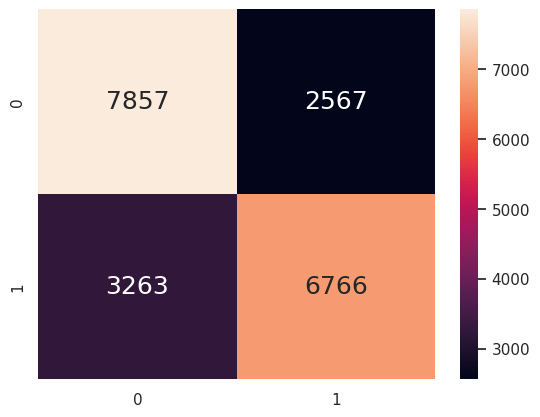

In [34]:
#15 neighbours
dokNN(15)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10424
           1       0.74      0.65      0.69     10029

    accuracy                           0.72     20453
   macro avg       0.72      0.72      0.72     20453
weighted avg       0.72      0.72      0.72     20453

Accuracy  :	 0.7172541925389918

TPR Train :	 0.6458271014059228
TNR Train :	 0.7859746738296239

FPR Train :	 0.21402532617037606
FNR Train :	 0.3541728985940772


0.7172541925389918

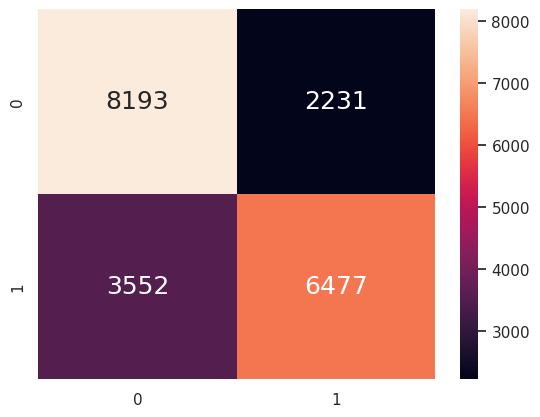

In [35]:
#20 neighbours
dokNN(20)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10424
           1       0.75      0.65      0.70     10029

    accuracy                           0.72     20453
   macro avg       0.72      0.72      0.72     20453
weighted avg       0.72      0.72      0.72     20453

Accuracy  :	 0.7214589546765756

TPR Train :	 0.6504137999800579
TNR Train :	 0.7898119723714505

FPR Train :	 0.2101880276285495
FNR Train :	 0.3495862000199422


0.7214589546765756

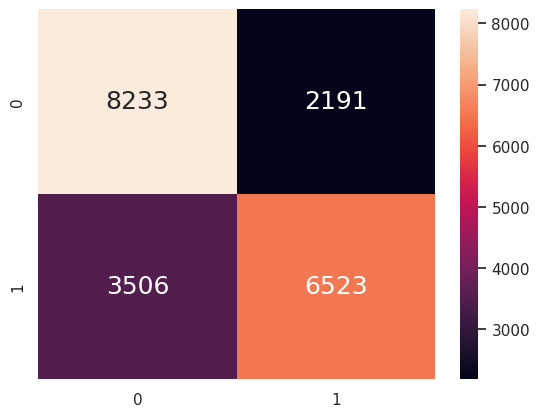

In [36]:
#30 neighbours
dokNN(30)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10424
           1       0.75      0.65      0.70     10029

    accuracy                           0.72     20453
   macro avg       0.73      0.72      0.72     20453
weighted avg       0.73      0.72      0.72     20453

Accuracy  :	 0.7244414022392803

TPR Train :	 0.6485192940472629
TNR Train :	 0.7974865694551037

FPR Train :	 0.2025134305448964
FNR Train :	 0.35148070595273706


0.7244414022392803

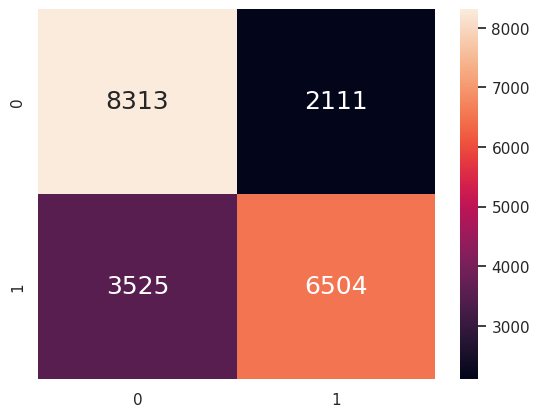

In [37]:
#50 neighbours
dokNN(50)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10424
           1       0.76      0.65      0.70     10029

    accuracy                           0.73     20453
   macro avg       0.73      0.72      0.72     20453
weighted avg       0.73      0.73      0.72     20453

Accuracy  :	 0.7254192538991835

TPR Train :	 0.6454282580516502
TNR Train :	 0.8023791250959325

FPR Train :	 0.19762087490406754
FNR Train :	 0.3545717419483498


0.7254192538991835

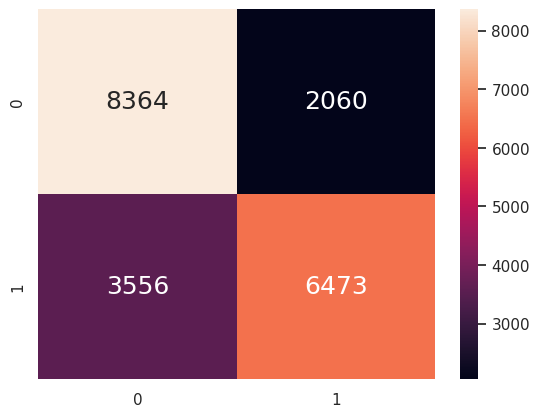

In [38]:
#100 neighbours
dokNN(100)

As can be observed above, the accuracy increases as K-increases but the rate at which the accuracy increases decreases.

In order to find the best number of neighbours, we ran a sample from 1 to 199 and determine the accuracy of the model in predicting cardiovascular disease.

In [39]:
#accuracy graph
apoints = []
for i in range(1,200):
    apoints.append(dokNN(i,False))

In [40]:
print(f"{max(apoints)} is highest accuracy with {1+apoints.index(max(apoints))} neighbours")

0.7263971055590867 is highest accuracy with 81 neighbours


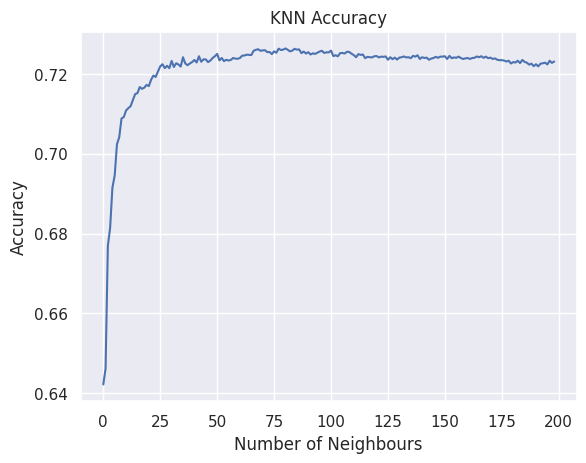

In [41]:
sb.lineplot(data=apoints).set(title='KNN Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()

From the graph we could see that 103 neighbours is able to give the best accuracy of 73.2%.

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10424
           1       0.75      0.65      0.70     10029

    accuracy                           0.72     20453
   macro avg       0.73      0.72      0.72     20453
weighted avg       0.73      0.72      0.72     20453

Accuracy  :	 0.7246858651542561

TPR Train :	 0.6494166915943763
TNR Train :	 0.797102839600921

FPR Train :	 0.20289716039907904
FNR Train :	 0.3505833084056237


0.7246858651542561

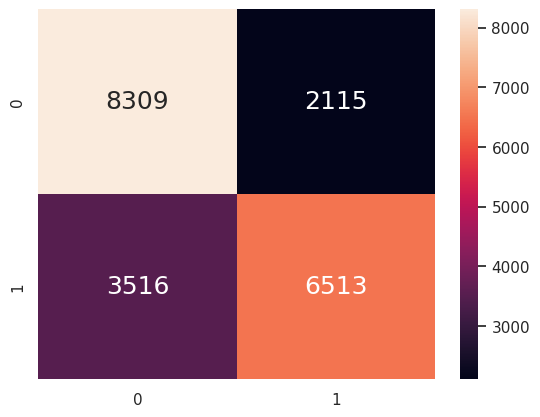

In [ ]:
#109 neighbours
dokNN(103)

It must be noted that the time KNN takes to make the prediction increases with number of independent variables (e.g. height, weight, alcohol, etc) increases. This is especially so given the large dataset used. This could potentially be a shortcoming applied in the context of predicting cardiovascular disease as the delay could be life-threatening. 

Another limitation of KNN is that it is highly sensitive to outliers, leading to accuracy issues. To combat this, outliers in the dataset should be removed first.

## Model 3 - Neural Networks

In this code, we're working with a dataset that contains information about cardiovascular health. Our goal is to create a mechanism for predicting cardiovascular disease using various methods, one of which being neural networks.

To start, we load in our dataset and perform some basic preprocessing steps. We remove any missing values from the data and scale the features using a standard scaler. Then, we split the data into training and testing sets so that we can train our model on one set and test it on the other to evaluate its performance.

Now we're ready to create our neural network model. We'll be using the Sequential class from the Keras library to build our model. Sequential is a linear stack of layers, where you can simply add one layer at a time. Our model will have several dense layers with ReLU activation functions, as well as an output layer with a sigmoid activation function to predict binary outcomes.

We then compile our model, setting binary crossentropy as the loss function and using the Adam optimizer. We also add early stopping to the model, which will stop training if the validation loss stops improving for 5 consecutive epochs. This is a technique used to prevent overfitting.

Next, we fit the model on our training set with a validation split of 20% and a batch size of 16. We train for 50 epochs to allow the model to learn from the data and improve its performance over time.

After training is complete, we evaluate the model on the testing set and print out the accuracy score. Finally, we plot the training and validation accuracy over epochs to visualize how the model's performance improved throughout the training process.

Overall, this code provides a solid framework for creating and training a neural network model to predict cardiovascular disease.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

# load data
df = heartdata

# preprocessing
df = df.dropna()  # drop missing values
X = df.drop('Cardio', axis=1)
y = df['Cardio']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[early_stop])

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


The model was improved by adding regularization techniques and increasing the depth of the network. L2 regularization was added to the dense layers, along with dropout layers, to reduce overfitting. The number of dense layers was also increased to capture more complex relationships. By making these changes, the model can better generalize to new data and avoid overfitting. The model was then trained and evaluated in the same way as the original model to compare the results.

Epoch 1/50
2727/2727 [==============================] - 7s 2ms/step - loss: 0.5550 - accuracy: 0.7270 - val_loss: 0.5435 - val_accuracy: 0.7304
Epoch 2/50
2727/2727 [==============================] - 6s 2ms/step - loss: 0.5472 - accuracy: 0.7318 - val_loss: 0.5407 - val_accuracy: 0.7335
Epoch 3/50
2727/2727 [==============================] - 6s 2ms/step - loss: 0.5451 - accuracy: 0.7332 - val_loss: 0.5456 - val_accuracy: 0.7300
Epoch 4/50
2727/2727 [==============================] - 6s 2ms/step - loss: 0.5437 - accuracy: 0.7346 - val_loss: 0.5409 - val_accuracy: 0.7322
Epoch 5/50
2727/2727 [==============================] - 6s 2ms/step - loss: 0.5427 - accuracy: 0.7338 - val_loss: 0.5399 - val_accuracy: 0.7393
Epoch 6/50
2727/2727 [==============================] - 6s 2ms/step - loss: 0.5421 - accuracy: 0.7343 - val_loss: 0.5382 - val_accuracy: 0.7372
Epoch 7/50
2727/2727 [==============================] - 7s 2ms/step - loss: 0.5418 - accuracy: 0.7351 - val_loss: 0.5395 - val_accuracy:

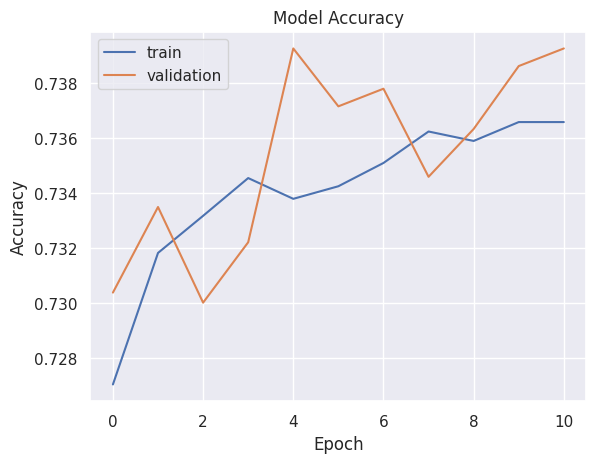

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

# load data
df = heartdata

# preprocessing
df = df.dropna()  # drop missing values
X = df.drop('Cardio', axis=1)
y = df['Cardio']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model
# create model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # changed activation function to sigmoid

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # changed loss function to binary_crossentropy

# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[early_stop])

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



# 5) Conclusion

We evaluated the 5 models and we chose KNN as our model due to the highest accuracy it has given. We firmly believe that it can achieve good accuracy in predicting cardiovascular disease. 

The model allows for dealing with variables that do not necessarily have a linear relationship with cardiovascular disease. A clear evidence of this is the finding that smoking does not have a linear relationship with cardiovascular disease. (Kondo et al, 2019).

The model can also offer a high level of accuracy provided that the optimal K value is used. It must be noted that by having a very small number of neighours, it could lead to high variance and low bias, which denotes overfitting. By having a large number of neighbours, it could lead to high bias and low variance, which denotes underfitting.

### Limitations of the model and how we can mitigate
1. Sensitive to irrelevant features
The accuracy of the model can be affected if irrelevant features are used. 

The dataset should be thoroughly cleaned and the correlation between each feature and cardiovascular disease should be assessed prior to using the feature for training the model.

2. Computationally Intensive
The model has to store all the data that was used for its training. This can cause finding the optimal K value to take a very long time.

As a mitigation, there should be a cut-off threshold established when searching for optimal K value. For example, if K=103 gave the highest accuracy and from K=104 to K=109, the accuracies are no higher than the highest, the search can cease and use K=103 as the optimal value.

This can help to save time when using the model, which could prove crucial in the context of real world application. A patient who is found to be at risk can be quickly attended to by medical professionals.